# International Economics Problem Set 1, Problem 1

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Q1: upload the data

In [180]:
data_path = '/Users/eliogruttadauria/Desktop/Bocconi/international_economics/PS1/comtrade.csv'
data = pd.read_csv(data_path)
data.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2016,2016,2016,0,0,1,Import,826,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,636367936193,NaN,NaN,0
1,H4,2016,2016,2016,0,0,2,Export,826,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,411463355625,NaN,NaN,0
2,H4,2016,2016,2016,0,0,1,Import,826,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,3009571,NaN,NaN,0
3,H4,2016,2016,2016,0,0,2,Export,826,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,21558083,NaN,NaN,0
4,H4,2016,2016,2016,0,0,1,Import,826,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,4394500,NaN,NaN,0


In [21]:
data.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [181]:
useless_cols = ['Period', 
                'Period Desc.', 
                'Aggregate Level', 
                'Is Leaf Code', 
                'Trade Flow Code',
                'Reporter Code',
                'Partner Code',
                '2nd Partner Code', 
                '2nd Partner', 
                '2nd Partner ISO',
                'Customs Proc. Code', 
                'Customs',
                'Mode of Transport Code',
                'Mode of Transport',
                'Commodity Code', 
                'Commodity',
                'Qty Unit Code',
                'Qty Unit', 
                'Qty', 
                'Alt Qty Unit Code', 
                'Alt Qty Unit', 
                'Alt Qty',
                'Netweight (kg)', 
                'Gross weight (kg)',
                'CIF Trade Value (US$)', 
                'FOB Trade Value (US$)', 
                'Flag']

In [182]:
data.drop(useless_cols, axis=1,inplace=True)

In [183]:
world_data = data[data['Partner'] == 'World']

In [184]:
data.drop(world_data.index, inplace=True)

In [185]:
data.head()

,Classification,Year,Trade Flow,Reporter,Reporter ISO,Partner,Partner ISO,Trade Value (US$)
2,H4,2016,Import,United Kingdom,GBR,Afghanistan,AFG,3009571
3,H4,2016,Export,United Kingdom,GBR,Afghanistan,AFG,21558083
4,H4,2016,Import,United Kingdom,GBR,Albania,ALB,4394500
5,H4,2016,Export,United Kingdom,GBR,Albania,ALB,23749074
6,H4,2016,Import,United Kingdom,GBR,Antarctica,ATA,2711


### Extra: upload distance data

Data taken from https://www.distancefromto.net/distance-from-united-kingdom-country

In [270]:
distance_path = '/Users/eliogruttadauria/Desktop/Bocconi/international_economics/PS1/distance.csv'
distance = pd.read_csv(distance_path, sep=';')
distance['Country_Name'] = distance.Country
distance.head()

,Country,Distance,Mileage,Country_Name
0,Distance from Andorra to United Kingdom,"1,475 km",917 miles,Distance from Andorra to United Kingdom
1,Distance from United Arab Emirates to United K...,"5,837 km","3,627 miles",Distance from United Arab Emirates to United K...
2,Distance from Afghanistan to United Kingdom,"5,814 km","3,613 miles",Distance from Afghanistan to United Kingdom
3,Distance from Antigua and Barbuda to United Ki...,"6,476 km","4,024 miles",Distance from Antigua and Barbuda to United Ki...
4,Distance from Anguilla to United Kingdom,"6,448 km","4,007 miles",Distance from Anguilla to United Kingdom


In [271]:
for country in data.Partner:
    
    i=0
    
    splits = country.split()
    
    for string in distance.Country:
        
        for split in splits:
            j = 0
            
            if split in string:
                j+=1
                
            if j==1 and len(splits)==1:
                distance.iloc[i,3] = country
            elif j>1:
                distance.iloc[i,3] = country
            else:
                pass
        i+=1

In [272]:
complicated_countries = [x for x in distance.Country_Name if x.split()[0] == 'Distance']

In [273]:
complicated_countries

['Distance from United Arab Emirates to United Kingdom',
 'Distance from Antigua and Barbuda to United Kingdom',
 'Distance from Aland Islands to United Kingdom',
 'Distance from Bosnia and Herzegovina to United Kingdom',
 'Distance from Burkina Faso to United Kingdom',
 'Distance from Saint Barthelemy to United Kingdom',
 'Distance from Brunei to United Kingdom',
 'Distance from Bolivia to United Kingdom',
 'Distance from Bouvet Island to United Kingdom',
 'Distance from Cocos Islands to United Kingdom',
 'Distance from Central African Republic to United Kingdom',
 'Distance from Ivory Coast to United Kingdom',
 'Distance from Cook Islands to United Kingdom',
 'Distance from Costa Rica to United Kingdom',
 'Distance from Cape Verde to United Kingdom',
 'Distance from Curacao to United Kingdom',
 'Distance from Christmas Island to United Kingdom',
 'Distance from Czech Republic to United Kingdom',
 'Distance from Western Sahara to United Kingdom',
 'Distance from Falkland Islands to Un

In [274]:
distance.index = distance['Country']

In [275]:
# manual adjustment

distance.loc['Distance from United Kingdom to United States', 'Country_Name'] = 'USA'
distance.loc['Distance from United Kingdom to Russia', 'Country_Name'] = 'Russian Federation'
distance.loc['Distance from United Kingdom to Hong Kong', 'Country_Name'] = 'China, Hong Kong SAR'
distance.loc['Distance from United Kingdom to Vietnam', 'Country_Name'] = 'Viet Nam'
distance.loc['Distance from Czech Republic to United Kingdom', 'Country_Name'] = 'Czechia'
distance.loc['Distance from United Kingdom to South Korea', 'Country_Name'] = 'Rep. of Korea'
distance.loc['Distance from United Arab Emirates to United Kingdom', 'Country_Name'] = 'United Arab Emirates'
distance.loc['Distance from United Kingdom to South Africa', 'Country_Name'] = 'South Africa'

In [276]:
distance.drop(complicated_countries, axis=0, inplace=True)

In [277]:
distance.head(10)

,Country,Distance,Mileage,Country_Name
Country,,,,
Distance from Andorra to United Kingdom,Distance from Andorra to United Kingdom,"1,475 km",917 miles,Andorra
Distance from Afghanistan to United Kingdom,Distance from Afghanistan to United Kingdom,"5,814 km","3,613 miles",Afghanistan
Distance from Anguilla to United Kingdom,Distance from Anguilla to United Kingdom,"6,448 km","4,007 miles",Anguilla
Distance from Albania to United Kingdom,Distance from Albania to United Kingdom,"2,336 km","1,452 miles",Albania
Distance from Armenia to United Kingdom,Distance from Armenia to United Kingdom,"3,905 km","2,426 miles",Armenia
Distance from Angola to United Kingdom,Distance from Angola to United Kingdom,"7,666 km","4,763 miles",Angola
Distance from Antarctica to United Kingdom,Distance from Antarctica to United Kingdom,"16,646 km","10,343 miles",Antarctica
Distance from Argentina to United Kingdom,Distance from Argentina to United Kingdom,"11,882 km","7,383 miles",Argentina
Distance from American Samoa to United Kingdom,Distance from American Samoa to United Kingdom,"15,318 km","9,518 miles",Samoa


In [278]:
for i in range(distance.shape[0]):
    
    distance.iloc[i, 1] = distance.iloc[i, 1].split()[0]

In [279]:
distance['Distance'] = (distance['Distance'].replace('\.', '', regex=True).replace(',', '', regex=True).astype(int))

In [280]:
country_doubles = distance.duplicated('Country_Name',keep=False)
duplicates_index = []

for i in range(len(country_doubles)):
    if country_doubles.iloc[i]:
        print(i, '-', distance.iloc[i, 0], '-', distance.iloc[i, 3])
        duplicates_index.append(i)

8 - Distance from American Samoa to United Kingdom - Samoa
28 - Distance from Democratic Republic of the Congo to United Kingdom - Congo
29 - Distance from Republic of the Congo to United Kingdom - Congo
39 - Distance from Dominica to United Kingdom - Dominica
40 - Distance from Dominican Republic to United Kingdom - Dominica
57 - Distance from United Kingdom to Guinea - Guinea
58 - Distance from United Kingdom to Equatorial Guinea - Guinea
60 - Distance from United Kingdom to South Georgia and the South Sandwich Islands - Georgia
71 - Distance from United Kingdom to India - India
72 - Distance from United Kingdom to British Indian Ocean Territory - India
110 - Distance from United Kingdom to Netherlands - Netherlands
117 - Distance from United Kingdom to Papua New Guinea - Guinea
130 - Distance from United Kingdom to Sudan - Sudan
131 - Distance from United Kingdom to South Sudan - Sudan
156 - Distance from United Kingdom to Samoa - Samoa
160 - Distance from United Kingdom to Netherla

In [282]:
distance.index = range(distance.shape[0])
distance.drop(['Mileage', 'Country'], axis=1, inplace=True)

drop_duplicates = [x for x in duplicates_index if x not in [71,110]]
distance.drop(drop_duplicates, inplace=True)

In [283]:
distance.head(10)

,Distance,Country_Name
0,1475,Andorra
1,5814,Afghanistan
2,6448,Anguilla
3,2336,Albania
4,3905,Armenia
5,7666,Angola
6,16646,Antarctica
7,11882,Argentina
9,1515,Austria
10,15206,Australia


### Extra: upload GDP data

Data taken from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [223]:
gdp_path = '/Users/eliogruttadauria/Desktop/Bocconi/international_economics/PS1/gdp.csv'
gdp = pd.read_csv(gdp_path)
gdp.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,MLN_USD,A,1960,25036.1668,NaN
1,AUS,GDP,TOT,MLN_USD,A,1961,25326.3822,NaN
2,AUS,GDP,TOT,MLN_USD,A,1962,27913.2057,NaN
3,AUS,GDP,TOT,MLN_USD,A,1963,30385.7232,NaN
4,AUS,GDP,TOT,MLN_USD,A,1964,32695.8783,NaN


In [224]:
drop_year = [x for x in gdp.index if gdp.loc[x, 'TIME'] != 2016]

In [225]:
gdp.drop(drop_year, inplace=True)
gdp = gdp.reset_index(drop=True)

In [226]:
drop_measure = [x for x in gdp.index if gdp.loc[x, 'MEASURE'] != 'MLN_USD']

In [228]:
gdp.drop(drop_measure, inplace=True)
gdp = gdp.reset_index(drop=True)

In [229]:
gdp.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1, inplace=True)

In [230]:
gdp.rename(columns = {'LOCATION':'Partner ISO'}, inplace=True)

In [231]:
gdp.head()

,Partner ISO,TIME,Value
0,AUS,2016,1.215898e+06
1,AUT,2016,4.512972e+05
2,BEL,2016,5.350735e+05
3,CAN,2016,1.625347e+06
4,CZE,2016,3.722574e+05


### Q2: test the model

In [241]:
i = np.where(gdp['Partner ISO'].values == 'GBR')[0][0]
UK_gdp = gdp.loc[i, 'Value']

In [242]:
data_import = data[data['Trade Flow'] == 'Import']
data_export = data[data['Trade Flow'] == 'Export']

In [244]:
data_import = pd.concat([data_import.set_index('Partner ISO'),gdp.set_index('Partner ISO')], axis=1, join='inner')
data_export = pd.concat([data_export.set_index('Partner ISO'),gdp.set_index('Partner ISO')], axis=1, join='inner')

In [285]:
data_import = pd.concat([data_import.set_index('Partner'),distance.set_index('Country_Name')], axis=1, join='inner')
data_export = pd.concat([data_export.set_index('Partner'),distance.set_index('Country_Name')], axis=1, join='inner')

In [286]:
data_import.head()

,Classification,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$),TIME,Value,Distance
Argentina,H4,2016,Import,United Kingdom,GBR,824595921,2016,8.788139e+05,11882
Australia,H4,2016,Import,United Kingdom,GBR,7048291903,2016,1.215898e+06,15206
Austria,H4,2016,Import,United Kingdom,GBR,4405251416,2016,4.512972e+05,1515
Belgium,H4,2016,Import,United Kingdom,GBR,31522505629,2016,5.350735e+05,757
Brazil,H4,2016,Import,United Kingdom,GBR,3217232839,2016,3.156494e+06,8967


In [287]:
data_export.head()

,Classification,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$),TIME,Value,Distance
Argentina,H4,2016,Export,United Kingdom,GBR,405736920,2016,8.788139e+05,11882
Australia,H4,2016,Export,United Kingdom,GBR,5302224254,2016,1.215898e+06,15206
Austria,H4,2016,Export,United Kingdom,GBR,2436542180,2016,4.512972e+05,1515
Belgium,H4,2016,Export,United Kingdom,GBR,15715522064,2016,5.350735e+05,757
Brazil,H4,2016,Export,United Kingdom,GBR,2550112752,2016,3.156494e+06,8967


In [290]:
world = world_data['Trade Value (US$)'].sum()

In [311]:
total_trade = data_import
total_trade['Trade Value (US$)'] = data_import['Trade Value (US$)'] + data_export['Trade Value (US$)']
total_trade['trade_ratio'] = total_trade['Trade Value (US$)']/total_trade['Value']
total_trade['Log_trade_ratio'] = np.log(total_trade['Trade Value (US$)']/total_trade['Value'])
total_trade.head()

,Classification,Year,Trade Flow,Reporter,Reporter ISO,Trade Value (US$),TIME,Value,Distance,Ratio of trade,Ratio_trade,Log_trade_ratio,trade_ratio
Argentina,H4,2016,Import,United Kingdom,GBR,3664754361,2016,8.788139e+05,11882,0.001561,0.001949,8.335699,4170.114382
Australia,H4,2016,Import,United Kingdom,GBR,44163861681,2016,1.215898e+06,15206,0.016847,0.021907,10.500179,36322.021323
Austria,H4,2016,Import,United Kingdom,GBR,21461046676,2016,4.512972e+05,1515,0.008855,0.011180,10.769624,47554.127266
Belgium,H4,2016,Import,United Kingdom,GBR,141531160077,2016,5.350735e+05,757,0.060080,0.075078,12.485626,264507.863116
Brazil,H4,2016,Import,United Kingdom,GBR,21068022103,2016,3.156494e+06,8967,0.007938,0.010371,8.806050,6674.501412


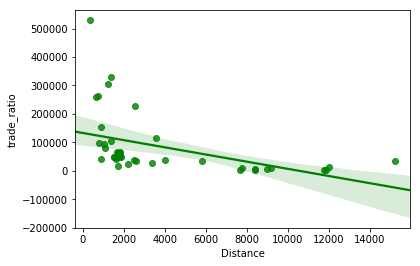

In [312]:
sns.regplot(x=total_trade.Distance, y=total_trade.trade_ratio, color="g")
plt.show()

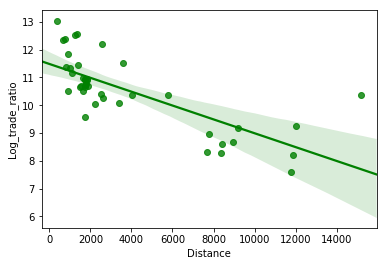

In [310]:
sns.regplot(x=total_trade.Distance, y=total_trade.Log_trade_ratio, color="g")
plt.show()